In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from data import load_medians_clean, load_medians


2025-02-18 10:44:38.652073: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 10:44:38.692445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-18 10:44:38.692470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-18 10:44:38.694504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 10:44:38.701205: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

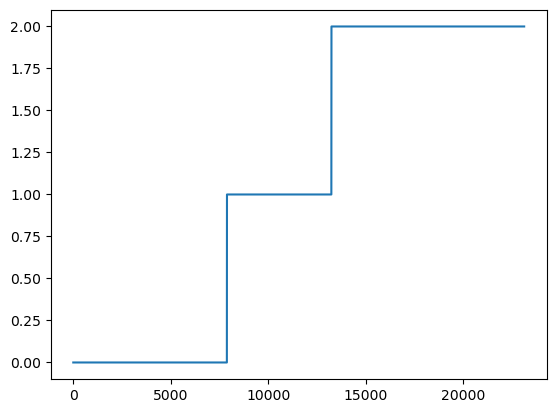

In [3]:
X, y_base, X_filter = load_medians_clean()
oh_enc = OneHotEncoder(sparse_output=False)
y = oh_enc.fit_transform(y_base)
plt.plot(y_base)
y

In [4]:
X_train_base, X_test_base, y_train, y_test, X_filter_train, X_filter_test = train_test_split(X, y, X_filter, test_size=0.2, shuffle=True, random_state=0)
print(X_train_base.shape)
print(X_test_base.shape)

abs_max = np.abs(X_train_base - 1).max()

X_train = (X_train_base - 1)/abs_max
X_test = (X_test_base - 1)/abs_max

# X_scaler = StandardScaler()
# X_train = X_scaler.fit_transform(X_train_base.reshape((-1, 1))).reshape(X_train_base.shape)
# X_test = X_scaler.transform(X_test_base.reshape((-1, 1))).reshape(X_test_base.shape)

(18512, 180, 1)
(4628, 180, 1)


In [5]:
x_input = keras.Input(X.shape[1:])
x = x_input
x = keras.layers.Conv1D(64, 5, padding="same", activation='relu')(x)
x = keras.layers.MaxPooling1D()(x)
x = keras.layers.Conv1D(32, 5, padding="same", activation='relu')(x)
x = keras.layers.MaxPooling1D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(x_input, x)

# optimizer = keras.optimizers.Adam(1e-4)
optimizer = keras.optimizers.RMSprop(3e-5)
model.compile(optimizer=optimizer, loss="bce")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 180, 64)           384       
                                                                 
 max_pooling1d (MaxPooling1  (None, 90, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 32)            10272     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 45, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 1440)              0     

2025-02-18 10:44:40.238657: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-02-18 10:44:40.238695: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: simul6
2025-02-18 10:44:40.238701: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: simul6
2025-02-18 10:44:40.238881: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2025-02-18 10:44:40.238906: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 525.147.5
2025-02-18 10:44:40.238910: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 525.147.5


In [6]:
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-7, patience=100, mode="min", restore_best_weights=True)
# history = model.fit(X_train[X_filter_train], y_train, epochs=1000, validation_split=0.15, callbacks=[early_stopping]) 
history = model.fit(X_train[X_filter_train], y_train[X_filter_train], epochs=100, validation_split=0.15) 

Epoch 1/100
195/460 [===========>..................] - ETA: 1s - loss: 0.6833Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1398175/3542803508.py", line 3, in <module>
    history = model.fit(X_train[X_filter_train], y_train[X_filter_train], epochs=100, validation_split=0.15)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/tensorflo

/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/simul6/anaconda3/envs/clint_ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

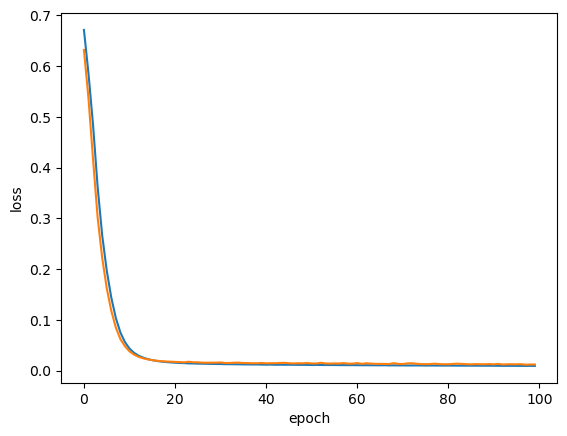

In [ ]:
history_curve = history.history
history_curve["epoch"] = list(range(len(history_curve["loss"])))
fig, ax = plt.subplots()
sns.lineplot(history_curve, x="epoch", y="loss", ax=ax)
sns.lineplot(history_curve, x="epoch", y="val_loss", ax=ax)
plt.show()

In [ ]:
keras.models.save_model(model, "./models/conv1d_median_clean.h5")

/tmp/ipykernel_1392302/3154705352.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "./models/conv1d_median_clean.h5")


137/137 [==============================] - 0s 2ms/step


[Text(0.5, 1.0, 'Test')]

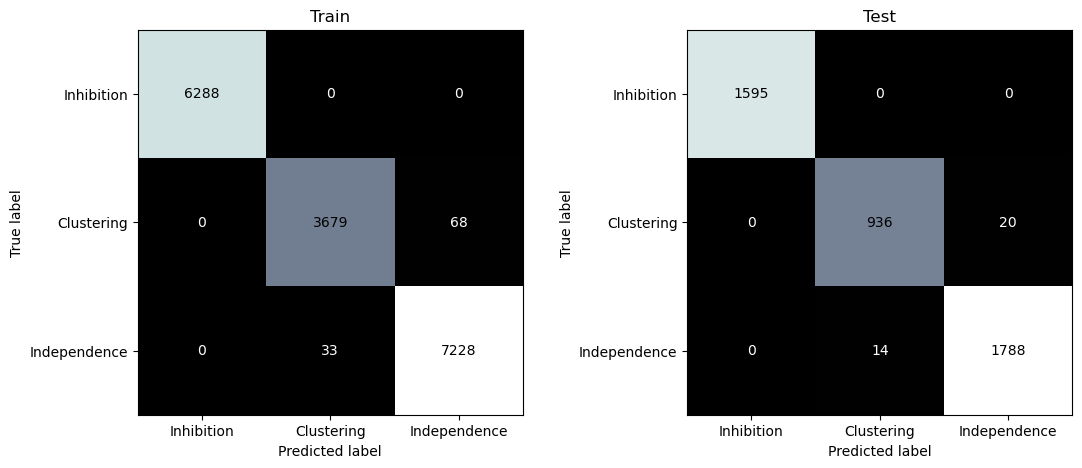

In [ ]:
pred_train = model.predict(X_train[X_filter_train])
y_train_disp = oh_enc.inverse_transform(y_train[X_filter_train])
pred_train_disp = oh_enc.inverse_transform(pred_train)

pred_test = model.predict(X_test[X_filter_test])
y_test_disp = oh_enc.inverse_transform(y_test[X_filter_test])
pred_test_disp = oh_enc.inverse_transform(pred_test)

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ConfusionMatrixDisplay.from_predictions(y_train_disp, pred_train_disp, ax=ax[0], colorbar=False, cmap="bone", display_labels=["Inhibition", "Clustering", "Independence"])
ax[0].set(title="Train")
ConfusionMatrixDisplay.from_predictions(y_test_disp, pred_test_disp, ax=ax[1], colorbar=False, cmap="bone", display_labels=["Inhibition", "Clustering", "Independence"])
ax[1].set(title="Test")

In [ ]:
X_full, y_full_base = load_medians()
y_full = oh_enc.fit_transform(y_full_base)

X_full_train_base, X_full_test_base, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, shuffle=True, random_state=0)
print(X_full_train_base.shape)
print(X_full_test_base.shape)

X_full_train = (X_full_train_base - 1)/abs_max
X_full_test = (X_full_test_base - 1)/abs_max

(18512, 180, 1)
(4628, 180, 1)


145/145 [==============================] - 0s 3ms/step


[Text(0.5, 1.0, 'Test')]

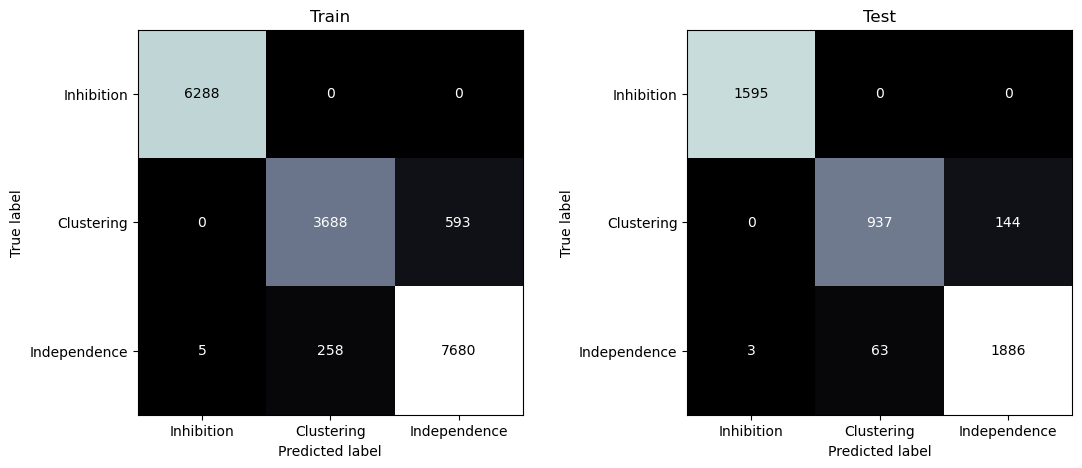

In [ ]:
pred_train = model.predict(X_full_train)
y_full_train_disp = oh_enc.inverse_transform(y_full_train)
pred_train_disp = oh_enc.inverse_transform(pred_train)

pred_test = model.predict(X_full_test)
y_full_test_disp = oh_enc.inverse_transform(y_full_test)
pred_test_disp = oh_enc.inverse_transform(pred_test)

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ConfusionMatrixDisplay.from_predictions(y_full_train_disp, pred_train_disp, ax=ax[0], colorbar=False, cmap="bone", display_labels=["Inhibition", "Clustering", "Independence"])
ax[0].set(title="Train")
ConfusionMatrixDisplay.from_predictions(y_full_test_disp, pred_test_disp, ax=ax[1], colorbar=False, cmap="bone", display_labels=["Inhibition", "Clustering", "Independence"])
ax[1].set(title="Test")